***Tutorial***

---



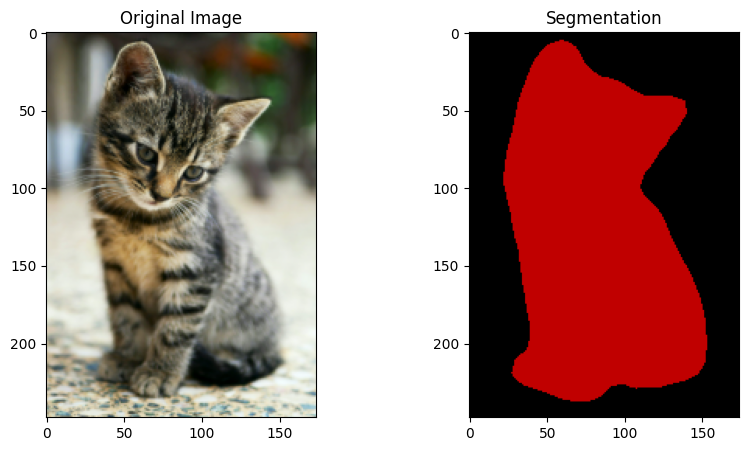

In [2]:
import torch
from torchvision import models, transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

#                         Load Pretrained Model
# Load DeepLabV3 with a ResNet-101 backbone pretrained on COCO dataset
model = models.segmentation.deeplabv3_resnet101(pretrained=True)
model.eval() # Set model to evaluation mode

#                        Load and Preprocess a Random Image
# Load a random image
image_path = "cat.png"
image = Image.open(image_path).convert('RGB')

# Define preprocessing pipeline
preprocess = transforms.Compose([
    transforms.ToTensor(), # Convert image to Tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Normalize as required by the model
])

# Preprocess the image
input_tensor = preprocess(image).unsqueeze(0) # Add batch dimension

#                             Perform Segmentation
# Perform inference
with torch.no_grad():
    output = model(input_tensor)['out'][0] # Extract segmentation output

# Convert output to class predictions
output_predictions = output.argmax(0) # Take the class with the highest probability

#                          Visualize the Segmentation Results
# Map class predictions to colors
def decode_segmentation(mask, num_classes=21):
    # Define color palette for Pascal VOC (21 classes)
    colors = np.array([
        [0, 0, 0],
        [128, 0, 0], [0, 128, 0], [0, 0, 128], [128, 0, 128],
        [0, 128, 128], [128, 128, 0], [64, 0, 0], [192, 0, 0],
        [64, 128, 0], [192, 128, 0], [64, 0, 128], [192, 0, 128],
        [64, 128, 128], [192, 128, 128], [0, 64, 0], [128, 64, 0],
        [0, 192, 0], [128, 192, 0], [0, 64, 128], [128, 64, 128]
    ])

    r = np.zeros_like(mask, dtype=np.uint8)
    g = np.zeros_like(mask, dtype=np.uint8)
    b = np.zeros_like(mask, dtype=np.uint8)

    for cls in range(num_classes):
        idx = mask == cls
        r[idx] = colors[cls, 0]
        g[idx] = colors[cls, 1]
        b[idx] = colors[cls, 2]

    return np.stack([r, g, b], axis=2)

# Decode the segmentation map
segmentation_map = decode_segmentation(output_predictions.numpy())

# Plot the original image and the segmentation
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title("Segmentation")
plt.imshow(segmentation_map)

plt.show()

***Task1***

---



In [5]:
!git clone https://github.com/VikramShenoy97/Human-Segmentation-Dataset.git

Cloning into 'Human-Segmentation-Dataset'...
remote: Enumerating objects: 596, done.
remote: Total 596 (delta 0), reused 0 (delta 0), pack-reused 596 (from 1)
Receiving objects: 100% (596/596), 13.60 MiB | 43.38 MiB/s, done.
Resolving deltas: 100% (7/7), done.


Processing single image: I1.jpg


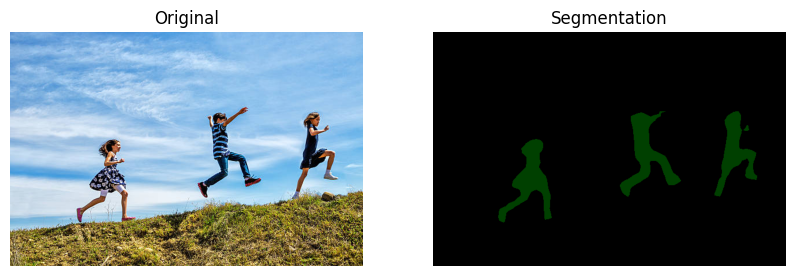

Saved: Result/segmented_result.png


In [8]:
import torch
from torchvision import models, transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

# 1. Load Pretrained Model
model = models.segmentation.deeplabv3_resnet101(pretrained=True)
model.eval()

# 2. Define Preprocessing
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 3. Visualization Helper Function
def decode_segmentation(mask, num_classes=21):
    # Define color palette for Pascal VOC (21 classes)
    colors = np.array([
        [0, 0, 0],
        [128, 0, 0], [0, 128, 0], [0, 0, 128], [128, 0, 128],
        [0, 128, 128], [128, 128, 0], [64, 0, 0], [192, 0, 0],
        [64, 128, 0], [192, 128, 0], [64, 0, 128], [192, 0, 128],
        [64, 128, 128], [192, 128, 128], [0, 64, 0], [128, 64, 0],
        [0, 192, 0], [128, 192, 0], [0, 64, 128], [128, 64, 128]
    ])

    r = np.zeros_like(mask, dtype=np.uint8)
    g = np.zeros_like(mask, dtype=np.uint8)
    b = np.zeros_like(mask, dtype=np.uint8)

    for cls in range(num_classes):
        idx = mask == cls
        r[idx] = colors[cls, 0]
        g[idx] = colors[cls, 1]
        b[idx] = colors[cls, 2]

    return np.stack([r, g, b], axis=2)


# Define the path to image
image_path = "I1.jpg"

# Output folder to save results
output_folder = "Result"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

if os.path.exists(image_path):
    print(f"Processing single image: {image_path}")

    # Load Image
    image = Image.open(image_path).convert('RGB')

    # Preprocess
    input_tensor = preprocess(image).unsqueeze(0)

    # Perform Segmentation
    with torch.no_grad():
        output = model(input_tensor)['out'][0]

    output_predictions = output.argmax(0)

    # Decode Segmentation Map
    segmentation_map = decode_segmentation(output_predictions.numpy())

    # Visualize & Save Results
    plt.figure(figsize=(10, 5))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.title("Original")
    plt.imshow(image)
    plt.axis('off')

    # Segmentation Result
    plt.subplot(1, 2, 2)
    plt.title("Segmentation")
    plt.imshow(segmentation_map)
    plt.axis('off')

    # Save to folder
    save_filename = "segmented_result.png"
    save_path = os.path.join(output_folder, save_filename)
    plt.savefig(save_path)
    plt.show() # Show the plot
    plt.close()

    print(f"Saved: {save_path}")
else:
    print(f"Error: Image not found at {image_path}")


***TASK2***

---



/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth


100%|██████████| 170M/170M [00:00<00:00, 194MB/s]


Processing single image: I1.jpg


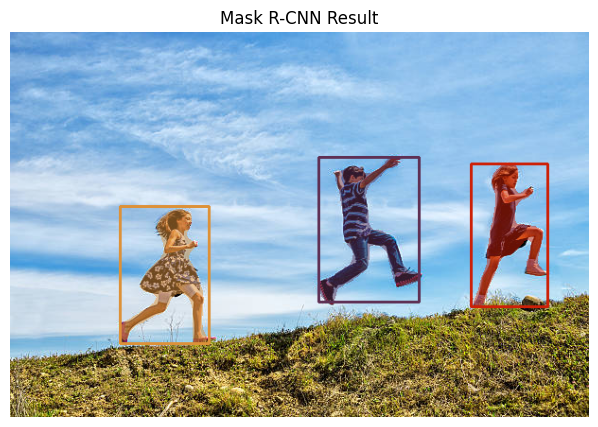

Saved: My_MaskRCNN_Result/maskrcnn_result.png


In [9]:
import torch
from torchvision import models, transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random

#  Load Pretrained Mask R-CNN Model
# We use Mask R-CNN instead of DeepLabV3 for Instance Segmentation
model = models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Define Preprocessing
preprocess = transforms.Compose([
    transforms.ToTensor()
])

# Visualization Helper Function
def visualize_instance_segmentation(image, output, threshold=0.5):
    # Convert image to numpy for OpenCV
    img_np = np.array(image)

    # Get predictions
    scores = output[0]['scores'].detach().cpu().numpy()
    masks = output[0]['masks'].detach().cpu().numpy()
    boxes = output[0]['boxes'].detach().cpu().numpy()

    # Create a copy to draw on
    result_img = img_np.copy()

    # Loop through every detected object
    for i in range(len(scores)):
        if scores[i] > threshold: # Only keep confident detections

            # Generate a random color for this object
            color = [random.randint(0, 255) for _ in range(3)]

            # Draw Bounding Box
            box = boxes[i].astype(int)
            cv2.rectangle(result_img, (box[0], box[1]), (box[2], box[3]), color, 2)

            # Draw Mask
            # Mask R-CNN outputs soft masks (0-1 floats), threshold at 0.5
            mask = masks[i, 0] > 0.5

            # Create a colored mask overlay
            colored_mask = np.zeros_like(result_img, dtype=np.uint8)
            colored_mask[mask] = color

            # Blend the colored mask with the original image
            alpha = 0.5
            mask_indices = mask > 0
            if mask_indices.any():
                result_img[mask_indices] = cv2.addWeighted(
                    result_img[mask_indices], 1 - alpha,
                    colored_mask[mask_indices], alpha,
                    0
                ).reshape(result_img[mask_indices].shape)

    return result_img


# Define the path to your single image
image_path = "I1.jpg"

# Output folder
output_folder = "My_MaskRCNN_Result"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

if os.path.exists(image_path):
    print(f"Processing single image: {image_path}")

    # Load Image
    image = Image.open(image_path).convert('RGB')

    # Preprocess
    input_tensor = preprocess(image).unsqueeze(0)

    # Inference
    with torch.no_grad():
        output = model(input_tensor)

    # Visualize
    # We pass the raw output because it contains boxes, scores AND masks
    result_image = visualize_instance_segmentation(image, output, threshold=0.5)

    # Save and Show
    plt.figure(figsize=(10, 5))
    plt.imshow(result_image)
    plt.axis('off')
    plt.title(f"Mask R-CNN Result")

    save_path = os.path.join(output_folder, "maskrcnn_result.png")
    plt.savefig(save_path)
    plt.show()
    plt.close()

    print(f"Saved: {save_path}")

else:
    print(f"Error: Image not found at {image_path}")